In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import methods_py as m
import re
import sys,time

# reload to make sure we have the latest version of method.py loaded
import importlib
importlib.reload(m)

import nltk
nltk.download(['punkt', 'wordnet','stopwords'])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_precision_recall_curve

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spam-filter/emails.csv
/kaggle/input/spam-filter/emails.csv
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/spam-filter/emails.csv


In [2]:
df = pd.read_csv("/kaggle/input/spam-filter/emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
m.explore_df(df)

The dataframe has  5728 rows and  2 columns 

There are  1 categorical columns and  1 numerical columns in the dataframe 

A list of all the categorical columns 

['text'] 

Total number of unique values for column  text is  5695 

The first 10 unique values are ["Subject:   http : / / www . virtu  ally - anywhere . com / sports /  hello ,  i was hoping you could help me . the link above takes  you to  several  facility stadiumtours created by virtually  anywhere  interactive . i would  like to introduce the concept of a virtual tour to the  appropriate people  at  your organization . ( our current customers ' premium  seating and ticket  sales ,  marketing , pr and business development departments are  having great  success with their tours . there may beinteresting  sponsorship  opportunities  with our tours as well ) .  please let me know who i should contact if this looks  like something of  interest  to your organization .  many thanks , davidp . s . you may have seen  us at the a

In [4]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

This looks like a decently balanced dataset based on how many of the messages have been marked as spam or not

In [5]:
m.explore_null(df)

The column(s) with all null values:  set() 

 More than  25 % of values are null for columns  set() 

 More than  50 % of values are null for columns  set() 

 More than  75 % of values are null for columns  set() 



No columns with all null values

In [6]:
def tokenize(text):
    '''
    INPUT
    text- the text that needs to be tokenized
    
    OUTPUT
    tokens - a list of tokenized words after cleaning up the input text
    
    This function :
    1. converts text to all lower case and removes punctuations
    2. tokenize entire text into words
    2. lemmatize each word using WordNetLemmatizer
    3. remove all stop words from text as per english corpus of stop words
    '''
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    # initiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

In [7]:
def build_model():
    '''
    INPUT
    None
    
    OUTPUT
    pipeline- a pipeline built to tokenize, transform and classify text data
    
    This function :
    1. builds a pipeline of countvectorizer, tfidf transformer, and
    2. a random forest multi output classifier
    '''
    pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
    ])
    
    # below parameters have been selected keeping the model training time in mind
    # these can be modified to improve accuracy and precision
   
    parameters = {
              'clf__C':[0.1,1.0]
              }
    
    cv = GridSearchCV(pipeline, param_grid=parameters)
    return cv

In [8]:
def evaluate_model(model, X_test, Y_test):
    '''
    INPUT
    model : the model that needs to be evaluated
    X_test : validation data set i.e. messages in this case
    Y_test : the output data for X_test validation set i.e. 36 categories values
    category_names : the 36 category names
    
    OUTPUT
    classification report for the model based on predictions, gives
    the recall, precision and f1 score
    
    This function :
    1. utilizes the input model to make predictions
    2. compares the predictions to the test data to provide a classification report
    '''
    y_pred = model.predict(X_test)
    print(classification_report(Y_test, y_pred))

In [9]:
df['text'].head(1).to_list()

["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  m

In [10]:
X= df['text']
Y= df['spam']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
print('Building model...')
model = build_model()

Building model...


In [12]:
print('Training model...')
start_time = time.time()
model.fit(X_train, Y_train)
elapsed_time = round((time.time() - start_time)/60 , 2)
print('Training time...{} minutes'.format(elapsed_time))        

Training model...
Training time...4.2 minutes


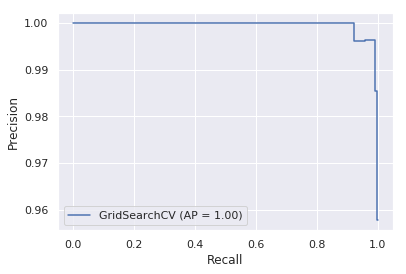

In [13]:
plot_precision_recall_curve(model, X_test, Y_test)

# display the plots
plt.show()

In [14]:
print('Evaluating model...')
evaluate_model(model, X_test, Y_test)

Evaluating model...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       873
           1       1.00      0.99      0.99       273

    accuracy                           1.00      1146
   macro avg       1.00      0.99      1.00      1146
weighted avg       1.00      1.00      1.00      1146



In [15]:
model.predict(X_test[:1])

array([1])